<a href="https://colab.research.google.com/github/davidnalbandyann/ACA_homework/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

<img src="files/svm.png">

Try to generate datasets like this, fit SVM on each of them and find best regularization parameter and best kernel for each (use CV).

Dataset settings
- 2 features
- not more than 10k points
- you can either try generating from distributions, and maybe removing some elements after
- or you can just generate by some functions, this would be easier, but it is OK

# 1

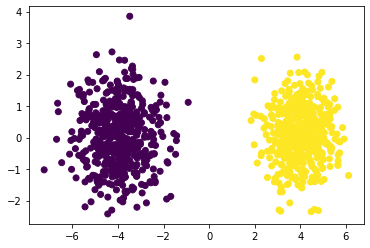

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt

# define centers and standard deviations
centers = [[-4, 0], [4, 0]]
stds = [1.0, 0.8]

# generate blobs with specified parameters
X1, y1 = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=42)

# print the generated data
plt.scatter(X1[:, 0], X1[:, 1], c=y1)

# 2

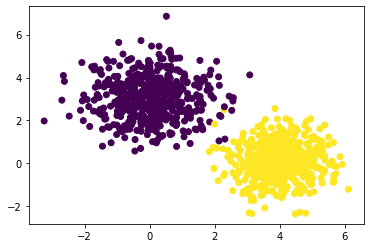

In [ ]:
from sklearn.svm import SVC

centers = [[0, 3], [4, 0]]
stds = [1.0, 0.8]

X2, y2 = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=42)

plt.scatter(X2[:, 0], X2[:, 1], c=y2)

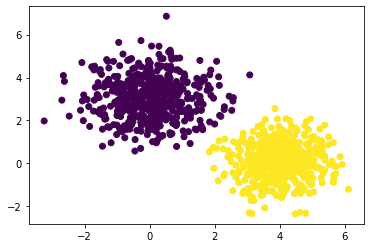

In [ ]:
svm = SVC()
svm.fit(X2, y2)
y2[svm.predict(X2) != y2] = y2[svm.predict(X2) != y2] == 0

plt.scatter(X2[:, 0], X2[:, 1], c=y2)

# 3

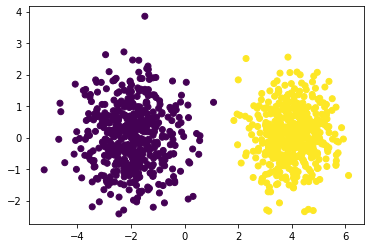

In [ ]:
centers = [[-2, 0], [4, 0]]
stds = [1.0, 0.8]

X3, y3 = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=42)

svm.fit(X3, y3)
y3[svm.predict(X3) != y3] = y3[svm.predict(X3) != y3] == 0

plt.scatter(X3[:, 0], X3[:, 1], c=y3)

In [ ]:
i = np.random.choice(len(y3))
y3[i] = y3[i] == 0

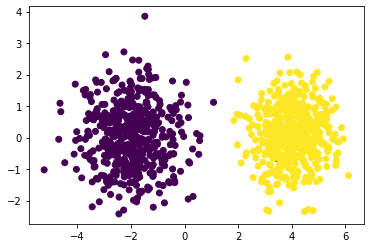

In [ ]:
plt.scatter(X3[:, 0], X3[:, 1], c=y3)

# 4

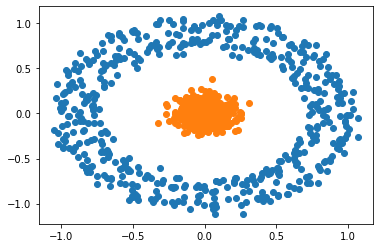

In [ ]:
from sklearn.datasets import make_circles
import numpy as np

X_c, _ = make_circles(n_samples=500, noise=0.05)
X_b, _ = make_blobs(n_samples=500, centers=[[0, 0]], cluster_std = [0.1], random_state=42)

plt.scatter(X_c[:, 0], X_c[:, 1])
plt.scatter(X_b[:, 0], X_b[:, 1])

In [ ]:
X_c = X_c[X_c[:, 0]>X_b[:, 0].min()-0.1]

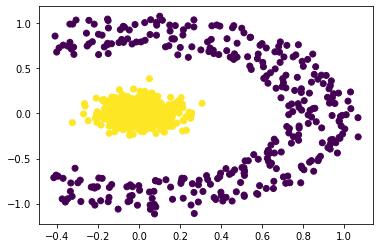

In [ ]:
X4 = np.vstack((X_c, X_b))
y4 = np.hstack((np.zeros(X_c.shape[0]), np.ones(X_b.shape[0])))
plt.scatter(X4[:, 0], X4[:, 1], c=y4)

# SVM

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1)
svm = SVC(kernel='linear', C=10**6)
svm.fit(X_train, y_train).score(X_test, y_test)

1.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2)
svm = SVC(kernel='linear', C=10**6)
svm.fit(X_train, y_train).score(X_test, y_test)

1.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3)
svm = SVC(kernel='linear', C=10**10)
svm.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4)
svm = SVC(kernel='rbf')`
svm.fit(X_train, y_train).score(X_test, y_test)

1.0

In [ ]:
svm.coef_

array([[ 1.92888381, -1.98324838]])

# Homework 2

Write a function is_kernel_function(func), which will return True f given function is a kernel function and False if it is not.

In [ ]:
import numpy as np

def is_kernel_function(func):
    X = np.random.rand(1000, 2)
    K = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            K[i, j] = func(X[i], X[j])

    if (K.T != K).any():
        return False

    print(np.linalg.eigvalsh(K))
    if np.all(np.linalg.eigvalsh(K) >= -1e-7):
        return True
    else:
        return False

In [ ]:
from numpy import tanh

In [ ]:
def sigmoid(x1, x2):
    return tanh(0.1*x1.T.dot(x2)+0.1)

In [ ]:
def poly(x1, x2):
    return x1.T.dot(x2)

In [ ]:
is_kernel_function(sigmoid)

[-2.98961667e-02 -1.18503066e-02 -9.76485412e-03 -3.88849920e-04
 -1.81772535e-04 -5.61287061e-05 -5.37888783e-05 -4.29893456e-09
 -8.15411774e-10 -2.57711421e-10 -1.13243297e-10 -7.96101147e-11
 -1.35034788e-11 -1.27208687e-11 -6.89847430e-13 -1.84674562e-13
 -2.97920322e-14 -2.69784516e-14 -9.94314936e-15 -5.11121499e-15
 -4.46243259e-15 -1.65883979e-15 -9.72930509e-16 -8.05990924e-16
 -7.99696796e-16 -7.93828505e-16 -7.88290292e-16 -7.77868347e-16
 -7.71500964e-16 -7.66249999e-16 -7.57967845e-16 -7.51350973e-16
 -7.47029528e-16 -7.44976396e-16 -7.40638206e-16 -7.38746758e-16
 -7.33497390e-16 -7.28081734e-16 -7.25707335e-16 -7.22028232e-16
 -7.14441266e-16 -7.13371274e-16 -7.11040590e-16 -7.05530580e-16
 -7.03554017e-16 -6.98520097e-16 -6.96275389e-16 -6.91191642e-16
 -6.89656795e-16 -6.87870355e-16 -6.84098709e-16 -6.82565100e-16
 -6.81562278e-16 -6.79042258e-16 -6.76203644e-16 -6.74549803e-16
 -6.71584331e-16 -6.68373114e-16 -6.66158628e-16 -6.64817587e-16
 -6.59999625e-16 -6.59011

False